In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sys
from contextlib import redirect_stdout

In [2]:
#Preprocessing the dataset
def load_and_preprocess_data():
    df = pd.read_csv('dataset/household_power_consumption.txt', 
                 sep=';',
                 parse_dates={'datetime': ['Date', 'Time']}, 
                 na_values='?',
                 infer_datetime_format=True, 
                 low_memory=False)
    df= df.dropna()
    df['Global_active_power'] = df['Global_active_power'].astype(float)
    df = df.set_index('datetime')
    return df

In [3]:
#What was the average active power consumption in March 2007?

def march_2007_data(df):
    march_2007 = df.loc['2007-03']
    print(f"Data for March 2007:\n{march_2007}")
    avg_power_march = march_2007['Global_active_power'].mean()
    print("Average active power consumption in March 2007:",avg_power_march," kW")
    return{"avg_power_march": avg_power_march}

In [4]:
#What hour of the day had the highest power usage on Christmas 2006?

def christmas_2006_data(df):
    christmas_2006 = df.loc['2006-12-25']
    print(f"Data for Christmas 2006:\n{christmas_2006}")
    hourly_usage = christmas_2006.groupby(christmas_2006.index.hour)['Global_active_power'].mean()
    max_hour = hourly_usage.idxmax()
    print(f"The hour of the day with the highest power usage on Christmas 2006: {max_hour}:00")
    return{"max_hour":max_hour}

In [5]:
#Compare energy usage (Global_active_power) on weekdays vs weekends.

def weekdays_weekends_data(df):
    # Create a column to identify weekdays (0-4) vs weekends (5-6)
    df['isWeekend'] = df.index.dayofweek>=5
    # Compare average power
    weekday_avg = df[~df['isWeekend']]['Global_active_power'].mean()
    weekend_avg = df[df['isWeekend']]['Global_active_power'].mean()

    print(f"Weekday average power: {weekday_avg:.2f} kW")
    print(f"Weekend average power: {weekend_avg:.2f} kW")
    return {
        "weekday_avg": weekday_avg,
        "weekend_avg": weekend_avg
    }

In [6]:
#Find days where total energy consumption exceeded 5 kWh.

def energy_exceeding_5kWh(df):
    # Calculate total energy consumption power
    df['Global_active_power'] = df['Global_active_power'] * 1000 / 60  # Convert to kWh
    daily_energy_consumption = df['Global_active_power'].resample('D').sum()
    days_exceeded_5_kwh = daily_energy_consumption[daily_energy_consumption > 5]
    print(days_exceeded_5_kwh)
    return {
        "days_exceeded_5_kwh": days_exceeded_5_kwh.to_dict()
    }    

In [21]:
#Plot the energy usage trend for the first week of January 2007.

def plot_energy_usage_jan_2007(df):
    # Filter data for the first week of January 2007
    first_week_jan_2007 = df[(df.index.year == 2007) & (df.index.month == 1) & (df.index.day <= 7)]

    # Plot the energy usage trend
    plt.figure(figsize=(10,6))
    plt.plot(first_week_jan_2007.index, first_week_jan_2007['Global_active_power'])
    plt.xlabel('Date')
    plt.ylabel('Global Active Power (kW)')
    plt.title('Energy Usage Trend for the First Week of January 2007')
    
    # Save plot to a buffer (to store in dictionary)
    buf = io.BytesIO()
    plt.savefig("images/Plot_energy_usage_jan_2007.png", format='png')
    buf.seek(0)
    plt.show()
    plt.close()
    return {
        "plot_data": buf.getvalue()  # Store image as bytes
    }

In [22]:
#Find the average voltage for each day of the first week of February 2007.

def avg_voltage_firstweek_feb_2007(df):
    first_week_feb= df['2007-02-01':'2007-02-07']
    daily_voltage = first_week_feb['Voltage'].resample('D').mean()
    print("Average voltage for each day of the first week of February 2007:")
    print(daily_voltage)
    return {
        "daily_voltage": daily_voltage.to_dict()
    }

In [23]:
#What is the correlation between global active power and sub-metering values?

def correlation_global_active_power_sub_metering(df):
    sub_meters = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    correlation = df[['Global_active_power'] + sub_meters].corr()
    print("Correlation between global active power and sub-metering values:")
    print(correlation)
    print("\n\n",correlation['Global_active_power'][sub_meters])
    return {
        "correlation_matrix": correlation.to_dict(),
        "correlation_with_global_active_power": correlation['Global_active_power'][sub_meters].to_dict()
    }

In [24]:
#What is the correlation between global active power and sub-metering values?. Can you show it using visualization

def visual_representation_of_correlation_and_submetering(df):
    # Calculate correlation between global active power and sub-metering values
    correlation = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

    # Print the correlation matrix
    print("Correlation matrix:")
    print(correlation)

    # Heatmap for correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    heatmap_buf = io.BytesIO()
    plt.savefig("images/visual_representation_of_correlation_and_submetering_heatmapGraph.png", format='png')
    heatmap_buf.seek(0)

    # Scatter plots
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    sns.scatterplot(x='Global_active_power', y='Sub_metering_1', data=df, ax=axs[0])
    axs[0].set_title("Sub_metering_1 vs Global Active Power")

    sns.scatterplot(x='Global_active_power', y='Sub_metering_2', data=df, ax=axs[1])
    axs[1].set_title("Sub_metering_2 vs Global Active Power")

    sns.scatterplot(x='Global_active_power', y='Sub_metering_3', data=df, ax=axs[2])
    axs[2].set_title("Sub_metering_3 vs Global Active Power")

    plt.tight_layout()
    scatter_buf = io.BytesIO()
    plt.savefig("images/visual_representation_of_correlation_and_submetering_scatterPlot.png", format='png')
    scatter_buf.seek(0)
    plt.show()  #Show the scatter plots

    return {
        "heatmap": heatmap_buf.getvalue(),
        "scatter_plots": scatter_buf.getvalue(),
        "correlation_matrix": correlation.to_dict()
    }

In [25]:
#Plot the energy usage trend for the first week of January 2007. Can you aggregate data by day

def plot_energy_usage_jan_2007_aggregated(df):
    # Filter data for the first week of January 2007
    df_filtered = df[(df.index >= '2007-01-01') & (df.index < '2007-01-08')]

    # Aggregate by day (mean energy usage per day)
    df_daily = df_filtered['Global_active_power'].resample('D').mean()

    # Plot the trend
    plt.figure(figsize=(10, 5))
    df_daily.plot(marker='o', linestyle='-', color='blue')
    plt.title('Energy Usage Trend - First Week of January 2007')
    plt.xlabel('Date')
    plt.ylabel('Average Global Active Power (kW)')
    plt.grid(True)
    plt.tight_layout()

    #storing imgs as bytes
    plot_buf = io.BytesIO()
    plt.savefig("images/plot_energy_usage_jan_2007_aggregated.png", format='png')
    plot_buf.seek(0)
    
    plt.show()

    return {
        "plot_data": plot_buf.getvalue()
    }

In [12]:
df = load_and_preprocess_data()
test_case_result={}

In [13]:
print(df.columns.tolist())

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [14]:
#What was the average active power consumption in March 2007?
test_case_result["What was the average active power consumption in March 2007?"]=march_2007_data(df)

Data for March 2007:
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2007-03-01 00:00:00                0.226                  0.000   243.19   
2007-03-01 00:01:00                0.222                  0.000   243.52   
2007-03-01 00:02:00                0.218                  0.000   242.60   
2007-03-01 00:03:00                0.220                  0.000   243.11   
2007-03-01 00:04:00                0.220                  0.000   242.88   
...                                  ...                    ...      ...   
2007-03-31 23:55:00                3.466                  0.232   242.26   
2007-03-31 23:56:00                3.438                  0.224   242.08   
2007-03-31 23:57:00                3.324                  0.224   240.42   
2007-03-31 23:58:00                3.308                  0.222   240.38   
2007-03-31 23:59:00                3.726                  0.228   2

In [15]:
#What hour of the day had the highest power usage on Christmas 2006?
test_case_result["What hour of the day had the highest power usage on Christmas 2006?"]=christmas_2006_data(df)

Data for Christmas 2006:
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-25 00:00:00                0.586                  0.260   243.65   
2006-12-25 00:01:00                0.584                  0.258   243.26   
2006-12-25 00:02:00                0.648                  0.324   243.00   
2006-12-25 00:03:00                0.654                  0.360   242.66   
2006-12-25 00:04:00                0.656                  0.364   243.11   
...                                  ...                    ...      ...   
2006-12-25 23:55:00                2.892                  0.098   244.24   
2006-12-25 23:56:00                2.626                  0.108   244.65   
2006-12-25 23:57:00                2.556                  0.102   244.59   
2006-12-25 23:58:00                2.666                  0.104   244.11   
2006-12-25 23:59:00                2.750                  0.088

In [16]:
#Compare energy usage (Global_active_power) on weekdays vs weekends.
test_case_result["Compare energy usage (Global_active_power) on weekdays vs weekends"]=weekdays_weekends_data(df)

Weekday average power: 1.04 kW
Weekend average power: 1.23 kW


In [17]:
#Find days where energy consumption exceeded 5 kWh.
test_case_result["Find days where energy consumption exceeded 5 kWh"]=energy_exceeding_5kWh(df)

datetime
2006-12-16    20152.933333
2006-12-17    56507.666667
2006-12-18    36730.433333
2006-12-19    27769.900000
2006-12-20    37095.800000
                  ...     
2010-11-22    34025.600000
2010-11-23    26292.266667
2010-11-24    29937.466667
2010-11-25    23852.733333
2010-11-26    24801.733333
Name: Global_active_power, Length: 1433, dtype: float64


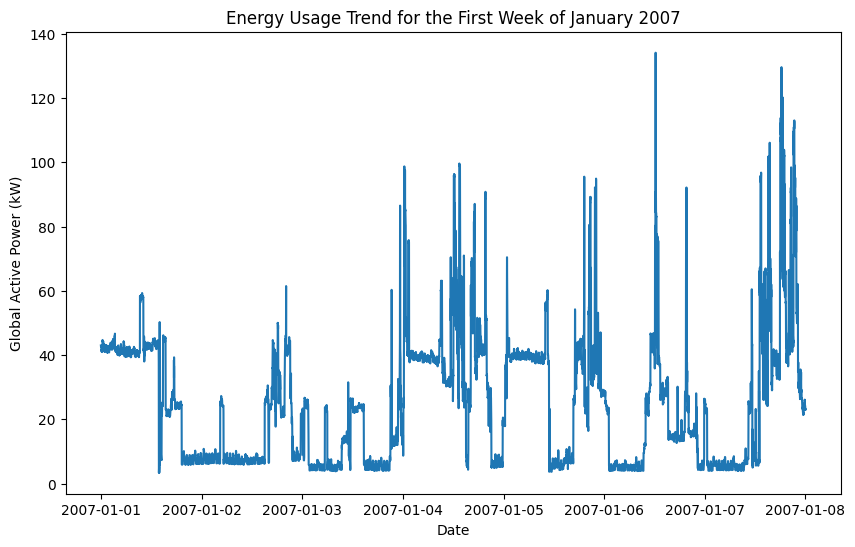

In [20]:
#Plot the energy usage trend for the first week of January 2007.
test_case_result["Plot the energy usage trend for the first week of January 2007"]=plot_energy_usage_jan_2007(df)

In [26]:
#Find the average voltage for each day of the first week of February 2007.
test_case_result["Find the average voltage for each day of the first week of February 2007"]=avg_voltage_firstweek_feb_2007(df)

Average voltage for each day of the first week of February 2007:
datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64


In [27]:
#What is the correlation between global active power and sub-metering values?
test_case_result["What is the correlation between global active power and sub-metering values?"]=correlation_global_active_power_sub_metering(df)

Correlation between global active power and sub-metering values:
                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


 Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64


Correlation matrix:
                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


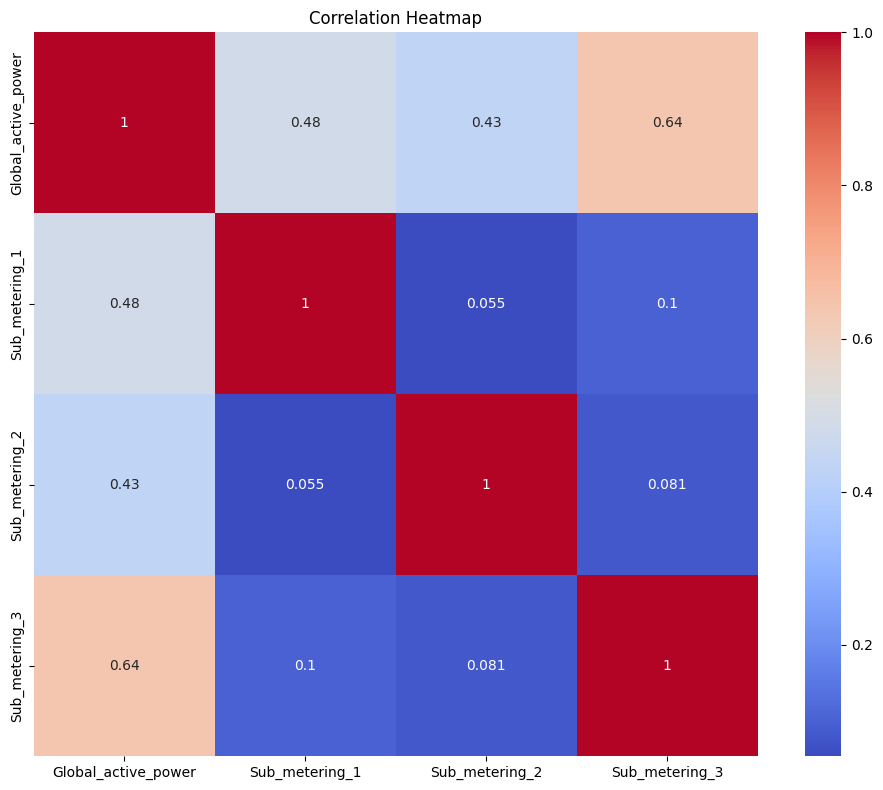

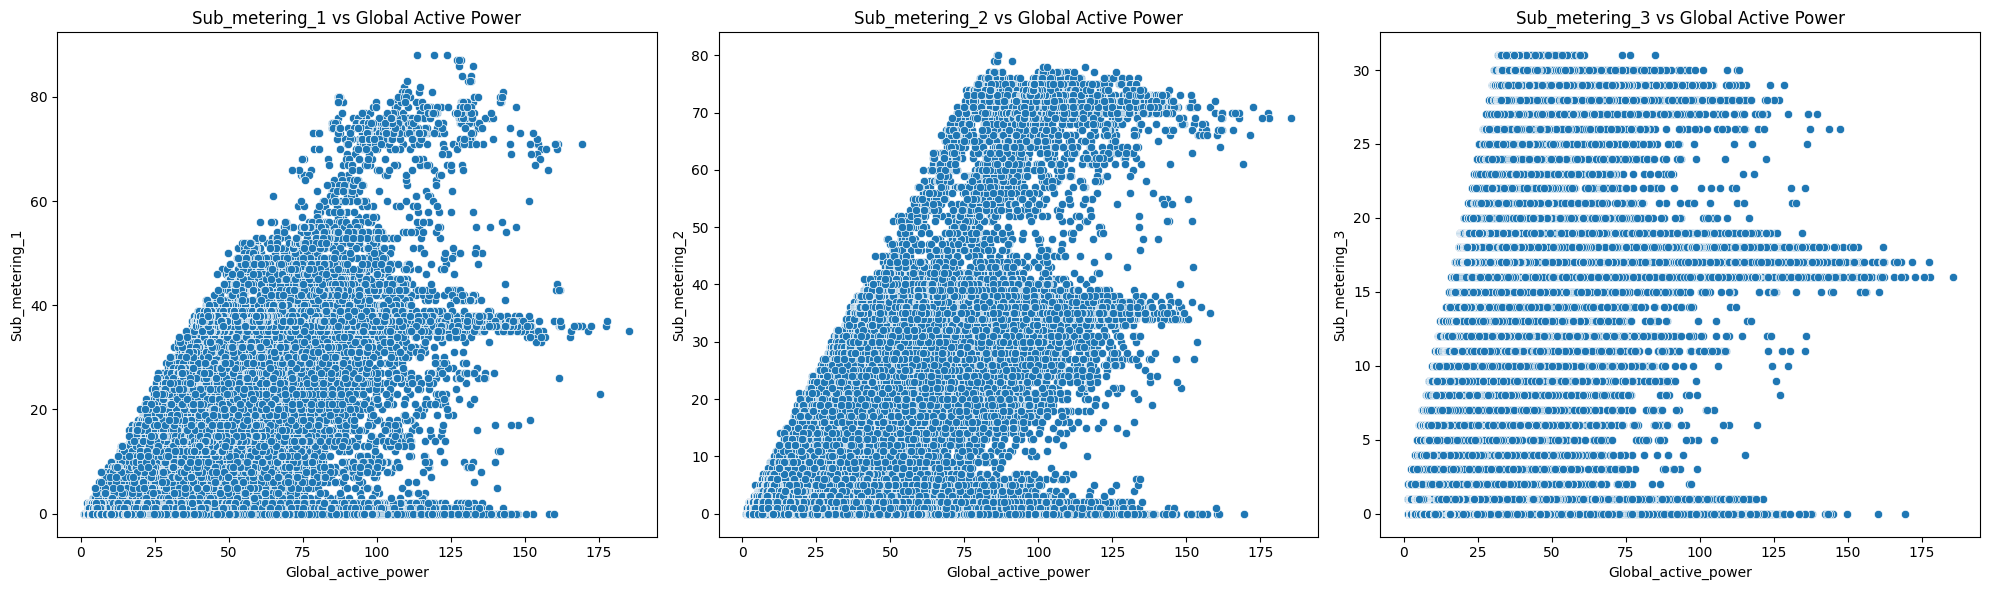

In [28]:
#What is the correlation between global active power and sub-metering values?. Can you show it using visualization
test_case_result["What is the correlation between global active power and sub-metering values?. Can you show it using visualization"]=visual_representation_of_correlation_and_submetering(df)

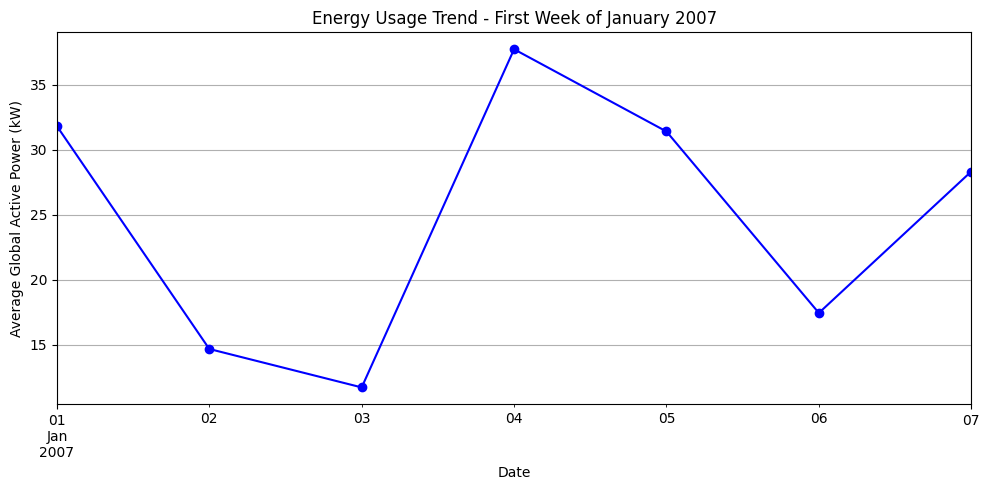

In [29]:
#Plot the energy usage trend for the first week of January 2007. Can you aggregate data by day
test_case_result["Plot the energy usage trend for the first week of January 2007. Can you aggregate data by day"]=plot_energy_usage_jan_2007_aggregated(df)

In [3]:
for k,v in test_case_result.items():
    print(k,": ",v)

What was the average active power consumption in March 2007? :  1
What hour of the day had the highest power usage on Christmas 2006? :  1
Compare energy usage (Global_active_power) on weekdays vs weekends :  1
Find days where total energy consumption exceeded 5 kWh :  1
Plot the energy usage trend for the first week of January 2007. Can you aggregrate data by month :  1
Find the average voltage for each day of the first week of February 2007 :  1
What is the correlation between global active power and sub-metering values? :  1
What is the correlation between global active power and sub-metering values?. Can you show it using visualization :  1
Plot the energy usage trend for the first week of January 2007. Can you aggregate data by day :  1


In [2]:
%store test_case_result

Stored 'test_case_result' (dict)
